In [1]:
!which python

/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/bin/python


In [2]:
print('here...')

here...


In [3]:
cd ~/workspace/theislab/scib

/storage/groups/ml01/workspace/ignacio.ibarra/theislab/scib


In [4]:
!ls -ltrh /storage/groups/ml01/workspace/ignacio.ibarra/theislab/retinal_scRNAseq_integration/data/integration_march_2021/input/input_all_cells.h5ad

-rw-r--r--. 1 140668 20000 12G Jun  3 10:32 /storage/groups/ml01/workspace/ignacio.ibarra/theislab/retinal_scRNAseq_integration/data/integration_march_2021/input/input_all_cells.h5ad


In [5]:
import scanpy as sc

/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/anndata/_core/anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


In [6]:
ad = sc.read_h5ad('/storage/groups/ml01/workspace/ignacio.ibarra/theislab/retinal_scRNAseq_integration/data/integration_march_2021/input/input_all_cells.h5ad')

In [7]:
print(ad.shape)

(2159366, 4127)


In [8]:
import numpy as np

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [9]:
# ad.obs['dataset'].value_counts()

In [10]:
n_sample = 10000
# count_thr = 5000

# ad_chen = ad[ad.obs['dataset'].str.contains('Chen_b') & (ad.obs['nCount_RNA'] > count_thr),:]

ad_chen = ad[ad.obs['dataset'].str.contains('Chen_b'),:]

sel_idx = np.random.choice(ad_chen[ad_chen.obs['cell.type'].str.contains('Rod'),:].obs_names, n_sample)
ad_chen = ad_chen[ad_chen.obs_names.isin(sel_idx),:]
ad_chen.shape

/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/anndata/_core/anndata.py:1056: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


(9462, 4127)

In [11]:
sc.pp.neighbors(ad_chen)

         Falling back to preprocessing with `sc.pp.pca` and default params.


/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/umap/nndescent.py:92: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/lat

In [12]:
sc.tl.umap(ad_chen)

In [13]:
sc.set_figure_params(facecolor='white')

In [14]:
ad_chen.obs

RNA_snn_res.0.8 batch dataset      filename  \
AAACCCAAGGACACTG-1-0:Chen_b:0                 1     0  Chen_b  19D015_NeuNM   
AAACCCATCACCCATC-1-0:Chen_b:0                 0     0  Chen_b  19D015_NeuNM   
AAACGAAAGCTGGAGT-1-0:Chen_b:0                 0     0  Chen_b  19D015_NeuNM   
AAACGCTCAGTCTTCC-1-0:Chen_b:0                 1     0  Chen_b  19D015_NeuNM   
AAAGAACCAATGTCTG-1-0:Chen_b:0                 1     0  Chen_b  19D015_NeuNM   
...                                         ...   ...     ...           ...   
TCTTTGAGTGGACCTC-1-14:Chen_b:14               4    14  Chen_b  19D014_NeuNT   
TGTTACTGTTCCAGGC-1-14:Chen_b:14               4    14  Chen_b  19D014_NeuNT   
TTACAGGAGTACAACA-1-14:Chen_b:14               4    14  Chen_b  19D014_NeuNT   
TTCCAATGTGGCAACA-1-14:Chen_b:14               4    14  Chen_b  19D014_NeuNT   
TTTCACAAGACCACGA-1-14:Chen_b:14               4    14  Chen_b  19D014_NeuNT   

                                 nCount_RNA  nFeature_RNA orig.ident  \
AAACCCAAGGACACTG-1-0:Chen_b:0        4863.0          2202          0   
AAACCCATCACCCATC-1-0:Chen_b:0        3862.0          1968          0   
AAACGAAAGCTGGAGT-1-0:Chen_b:0        8241.0          3254          0   
AAACGCTCAGTCTTCC-1-0:Chen_b:0        7165.0          2961          0   
AAAGAACCAATGTCTG-1-0:Chen_b:0        6228.0          2602          0   
...                                     ...           ...        ...   
TCTTTGAGTGGACCTC-1-14:Chen_b:14      1809.0          1061          0   
TGTTACTGTTCCAGGC-1-14:Chen_b:14      1342.0           943          0   
TTACAGGAGTACAACA-1-14:Chen_b:14      1974.0          1210          0   
TTCCAATGTGGCAACA-1-14:Chen_b:14      2890.0          1482          0   
TTTCACAAGACCACGA-1-14:Chen_b:14      2682.0          1481          0   

                                    scpred_AC  scpred_Astrocyte  scpred_BC  \
AAACCCAAGGACACTG-1-0:Chen_b:0    7.294500e-07          0.000008   0.000124   
AAACCCATCACCCATC-1-0:Chen_b:0    2.383908e-07          0.000012   0.000040   
AAACGAAAGCTGGAGT-1-0:Chen_b:0    1.064848e-07          0.000022   0.000033   
AAACGCTCAGTCTTCC-1-0:Chen_b:0    8.368912e-07          0.000016   0.000101   
AAAGAACCAATGTCTG-1-0:Chen_b:0    6.224163e-08          0.000031   0.000031   
...                                       ...               ...        ...   
TCTTTGAGTGGACCTC-1-14:Chen_b:14  1.676486e-07          0.000311   0.000198   
TGTTACTGTTCCAGGC-1-14:Chen_b:14  4.240716e-06          0.000069   0.000293   
TTACAGGAGTACAACA-1-14:Chen_b:14  9.532532e-06          0.000019   0.000113   
TTCCAATGTGGCAACA-1-14:Chen_b:14  3.544422e-08          0.000032   0.000032   
TTTCACAAGACCACGA-1-14:Chen_b:14  9.239340e-08          0.000021   0.000055   

                                 ...  scpred_RGC  scpred_RPE  scpred_Rod  \
AAACCCAAGGACACTG-1-0:Chen_b:0    ...    0.000078    0.000045    0.999922   
AAACCCATCACCCATC-1-0:Chen_b:0    ...    0.000057    0.000048    0.999930   
AAACGAAAGCTGGAGT-1-0:Chen_b:0    ...    0.000096    0.000061    0.999958   
AAACGCTCAGTCTTCC-1-0:Chen_b:0    ...    0.000063    0.000053    0.999940   
AAAGAACCAATGTCTG-1-0:Chen_b:0    ...    0.000063    0.000053    0.999947   
...                              ...         ...         ...         ...   
TCTTTGAGTGGACCTC-1-14:Chen_b:14  ...    0.000093    0.000049    0.999530   
TGTTACTGTTCCAGGC-1-14:Chen_b:14  ...    0.001109    0.000057    0.997181   
TTACAGGAGTACAACA-1-14:Chen_b:14  ...    0.000114    0.000057    0.999368   
TTCCAATGTGGCAACA-1-14:Chen_b:14  ...    0.000084    0.000056    0.999994   
TTTCACAAGACCACGA-1-14:Chen_b:14  ...    0.000073    0.000055    0.999993   

                                 scpred_max  scpred_prediction  \
AAACCCAAGGACACTG-1-0:Chen_b:0      0.999922                Rod   
AAACCCATCACCCATC-1-0:Chen_b:0      0.999930                Rod   
AAACGAAAGCTGGAGT-1-0:Chen_b:0      0.999958                Rod   
AAACGCTCAGTCTTCC-1-0:Chen_b:0      0.999940                Rod   
AAAGAACCAATGTCTG-1-0:Chen_b:0      0.9

In [15]:
ad_chen.shape

(9462, 4127)

In [16]:
len(ad_chen.obs['batch'].value_counts()), len(ad_chen.obs['donor'].value_counts())

(15, 6)

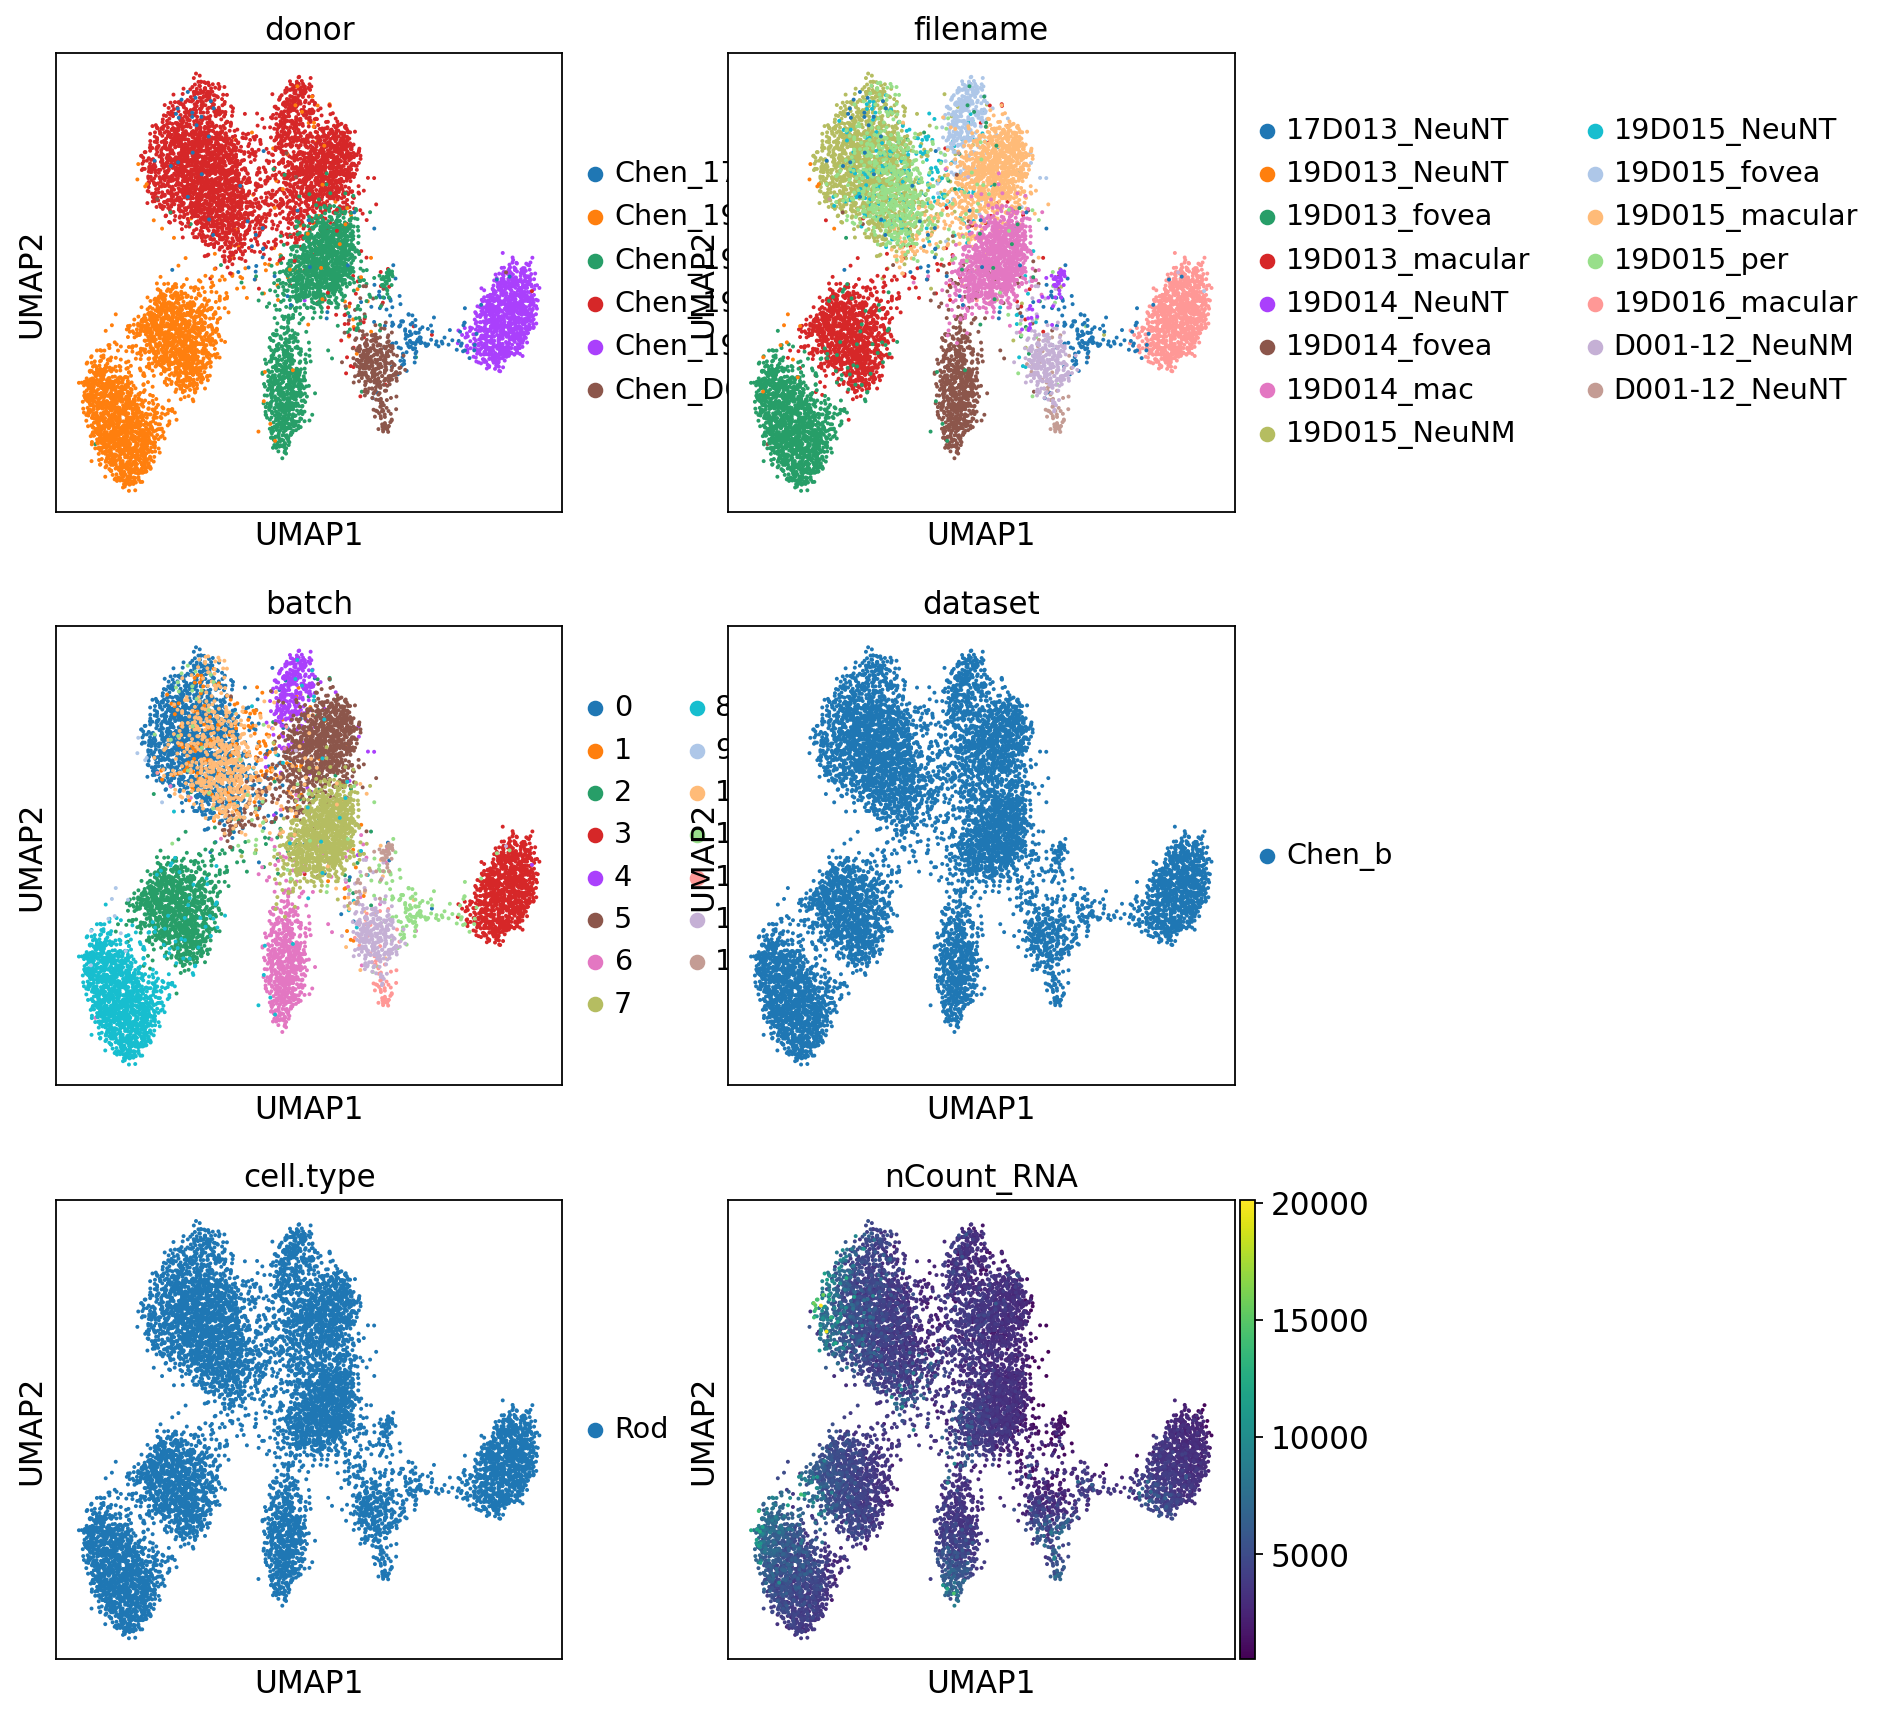

In [17]:
sc.pl.umap(ad_chen, color=['donor', 'filename', 'batch', 'dataset', 'cell.type', 'nCount_RNA'], ncols=2)

In [18]:
adata = ad_chen

In [19]:
# Check for counts data layer
if 'counts' not in adata.layers:
    raise TypeError('Adata does not contain a `counts` layer in `adata.layers[`counts`]`')

from scvi.models import VAE
from scvi.inference import UnsupervisedTrainer
from sklearn.preprocessing import LabelEncoder
from scvi.dataset import AnnDatasetFromAnnData


In [20]:
batch = 'batch'

In [21]:
import seaborn as sns

In [22]:
adata.obs.columns

Index(['RNA_snn_res.0.8', 'batch', 'dataset', 'filename', 'nCount_RNA',
       'nFeature_RNA', 'orig.ident', 'scpred_AC', 'scpred_Astrocyte',
       'scpred_BC', 'scpred_Cone', 'scpred_HC', 'scpred_MG',
       'scpred_Microglia', 'scpred_RGC', 'scpred_RPE', 'scpred_Rod',
       'scpred_max', 'scpred_prediction', 'seurat_clusters', 'size_factors',
       'cell.type', 'batch.merged', 'donor'],
      dtype='object')

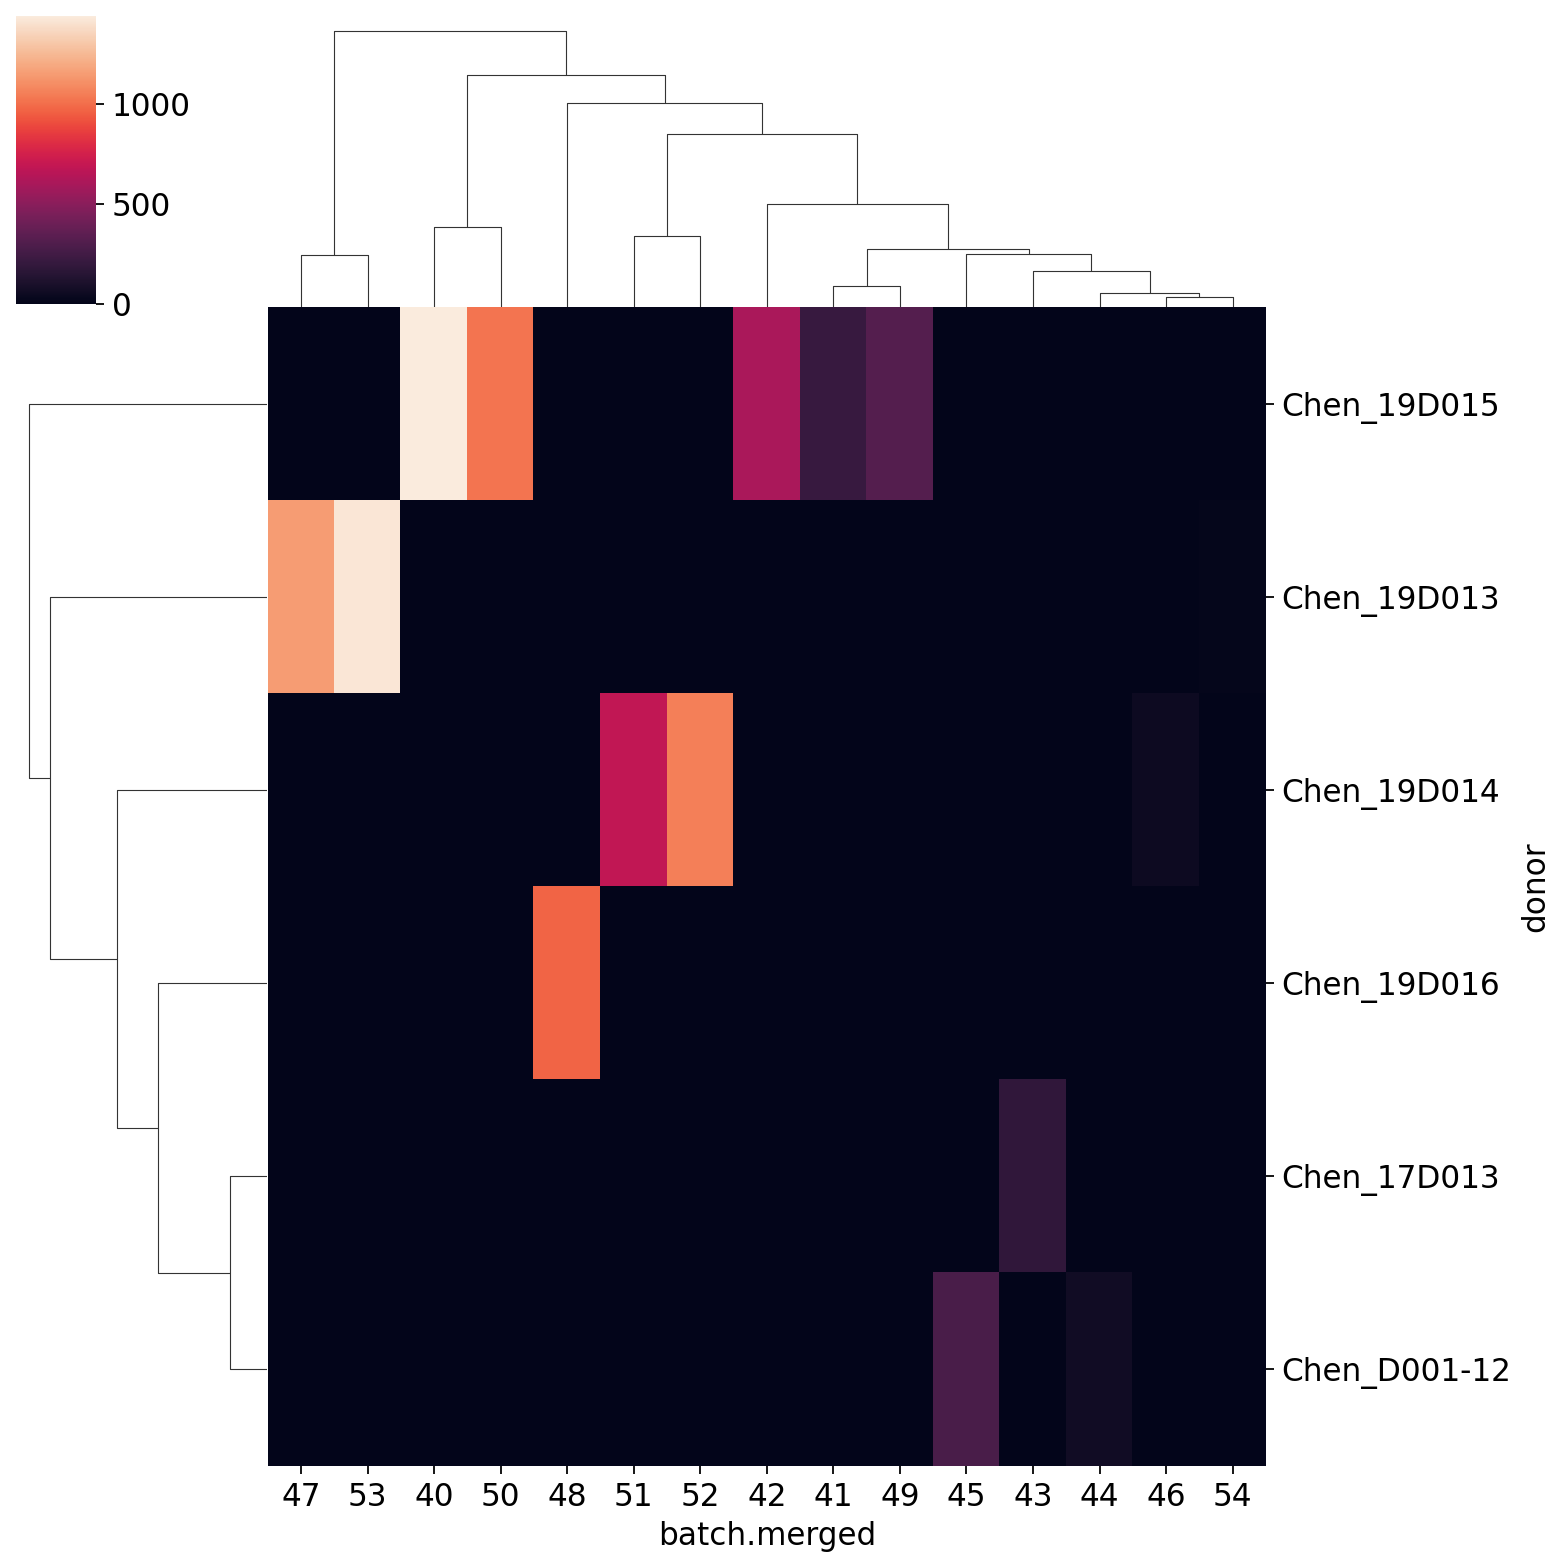

In [23]:
hm = adata.obs.groupby(['donor', 'batch.merged']).size().reset_index().pivot('donor', 'batch.merged', 0)
sns.clustermap(hm)

In [24]:
adata.obs['dataset'].value_counts(), adata.obs['batch'].value_counts(), adata.obs['cell.type'].value_counts()

(Chen_b    9462
 Name: dataset, dtype: int64,
 0     1442
 8     1422
 2     1152
 7     1055
 5     1024
 3      972
 6      682
 10     604
 4      316
 13     278
 1      209
 11     182
 12      63
 14      47
 9       14
 Name: batch, dtype: int64,
 Rod    9462
 Name: cell.type, dtype: int64)

In [25]:

# Defaults from SCVI github tutorials scanpy_pbmc3k and harmonization
n_epochs=np.min([round((20000/adata.n_obs)*400), 400])
n_latent = 30
n_hidden = 128
n_layers = 2

net_adata = adata.copy()
net_adata.X = adata.layers['counts']
del net_adata.layers['counts']
# Ensure that the raw counts are not accidentally used
del net_adata.raw # Note that this only works from anndata 0.7

# Define batch indices
le = LabelEncoder()
net_adata.obs['batch_indices'] = le.fit_transform(net_adata.obs[batch].values)

net_adata = AnnDatasetFromAnnData(net_adata)

vae = VAE(
    net_adata.nb_genes,
    reconstruction_loss='nb',
    n_batch=net_adata.n_batches,
    n_layers=n_layers,
    n_latent=n_latent,
    n_hidden=n_hidden,
)

trainer = UnsupervisedTrainer(
    vae,
    net_adata,
    train_size=1.0,
    use_cuda=False,
)

trainer.train(n_epochs=n_epochs, lr=1e-3)

full = trainer.create_posterior(trainer.model, net_adata, indices=np.arange(len(net_adata)))
latent, _, _ = full.sequential().get_latent()

adata.obsm['X_emb'] = latent


[2021-07-19 14:10:11,287] INFO - scvi.dataset.anndataset | Dense size under 1Gb, casting to dense format (np.ndarray).
[2021-07-19 14:10:11,439] INFO - scvi.dataset.dataset | Remapping labels to [0,N]
[2021-07-19 14:10:11,441] INFO - scvi.dataset.dataset | Remapping batch_indices to [0,N]
[2021-07-19 14:10:11,960] INFO - scvi.dataset.dataset | Computing the library size for the new data
[2021-07-19 14:10:12,037] INFO - scvi.dataset.dataset | Downsampled from 9462 to 9462 cells
[2021-07-19 14:10:12,061] INFO - scvi.inference.inference | KL warmup for 400 epochs
training: 100%|██████████| 400/400 [1:22:38<00:00, 12.40s/it]


In [26]:
print('done...')

done...


In [27]:
# sc.tl.umap?

In [28]:
# save 
adata.write('scVI_test_Rod.h5ad', compression='lzf')

In [29]:
!readlink -f .

/storage/groups/ml01/workspace/ignacio.ibarra/theislab/scib


In [30]:
!ls -ltrh scVI_test.h5ad

-rw-r--r--. 1 140668 20000 75M Jul 19 10:50 scVI_test.h5ad


In [31]:
print('neighbors... using %s' % 'X_emb' )
sc.pp.neighbors(adata, use_rep='X_emb')
print('umap...')
sc.tl.umap(adata)
print('done...')

neighbors... using X_emb


/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "../../../../../../../home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/umap/rp_tree.py", line 135:
@numba.njit(fastmath=True, nogil=True, parallel=True)
def euclidean_random_projection_split(data, indices, rng_state):
^

  state.func_ir.loc))
/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/numba/typed_passes.py:271: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-do

umap...
done...


In [32]:
from matplotlib import rcParams

In [33]:
rcParams['figure.dpi'] = 100

In [34]:
ad.obs.columns

Index(['RNA_snn_res.0.8', 'batch', 'dataset', 'filename', 'nCount_RNA',
       'nFeature_RNA', 'orig.ident', 'scpred_AC', 'scpred_Astrocyte',
       'scpred_BC', 'scpred_Cone', 'scpred_HC', 'scpred_MG',
       'scpred_Microglia', 'scpred_RGC', 'scpred_RPE', 'scpred_Rod',
       'scpred_max', 'scpred_prediction', 'seurat_clusters', 'size_factors',
       'cell.type', 'batch.merged', 'donor'],
      dtype='object')

In [35]:
adata.obs['nCount_RNA_log'] = np.log(adata.obs['nCount_RNA'])

In [36]:
import matplotlib.pyplot as plt

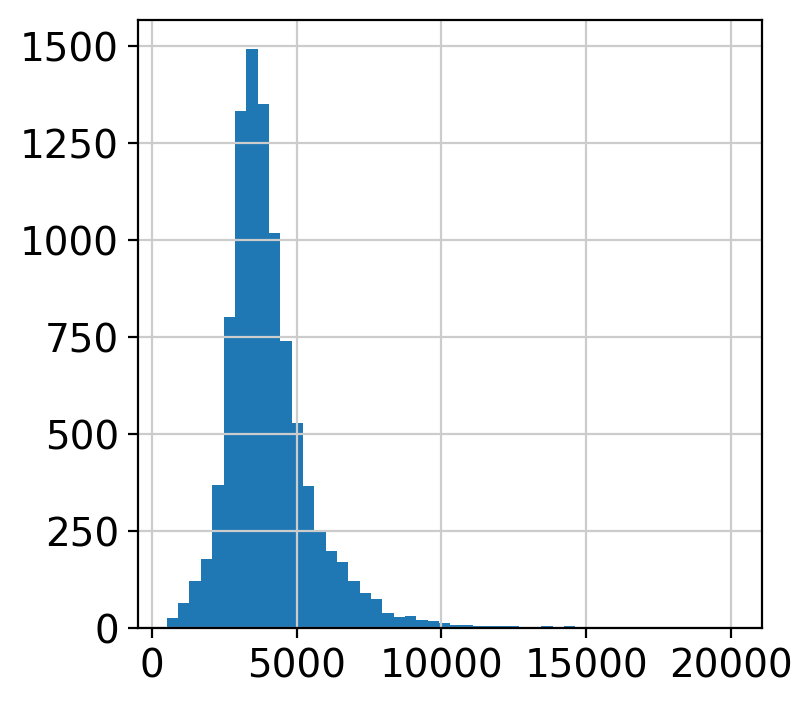

In [37]:
plt.hist(adata.obs['nCount_RNA'], bins=50);

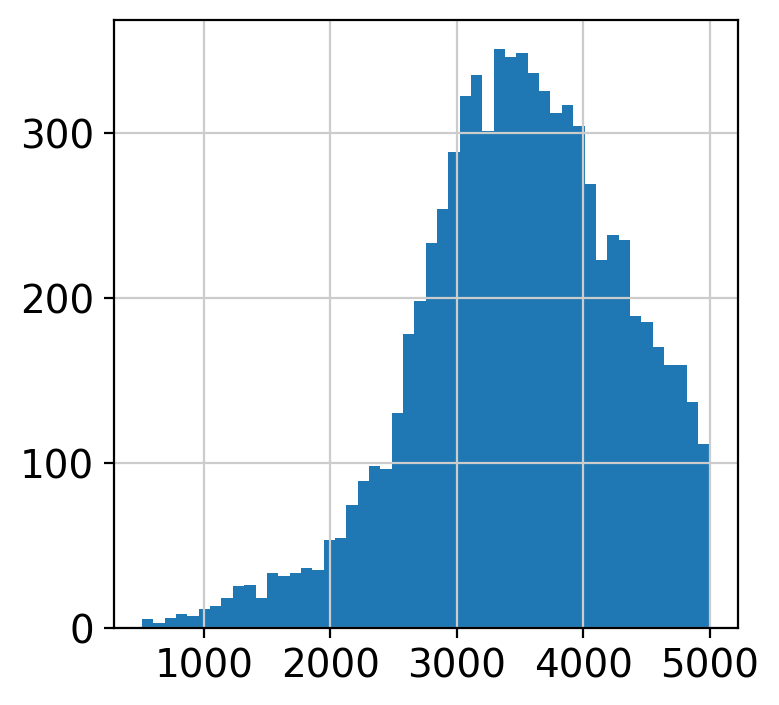

In [38]:
plt.hist(adata.obs['nCount_RNA'][adata.obs['nCount_RNA'] < 5000], bins=50);

/home/icb/ignacio.ibarra/miniconda3/envs/scIB-python/lib/python3.7/site-packages/scanpy/plotting/_utils.py:312: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  pl.show()


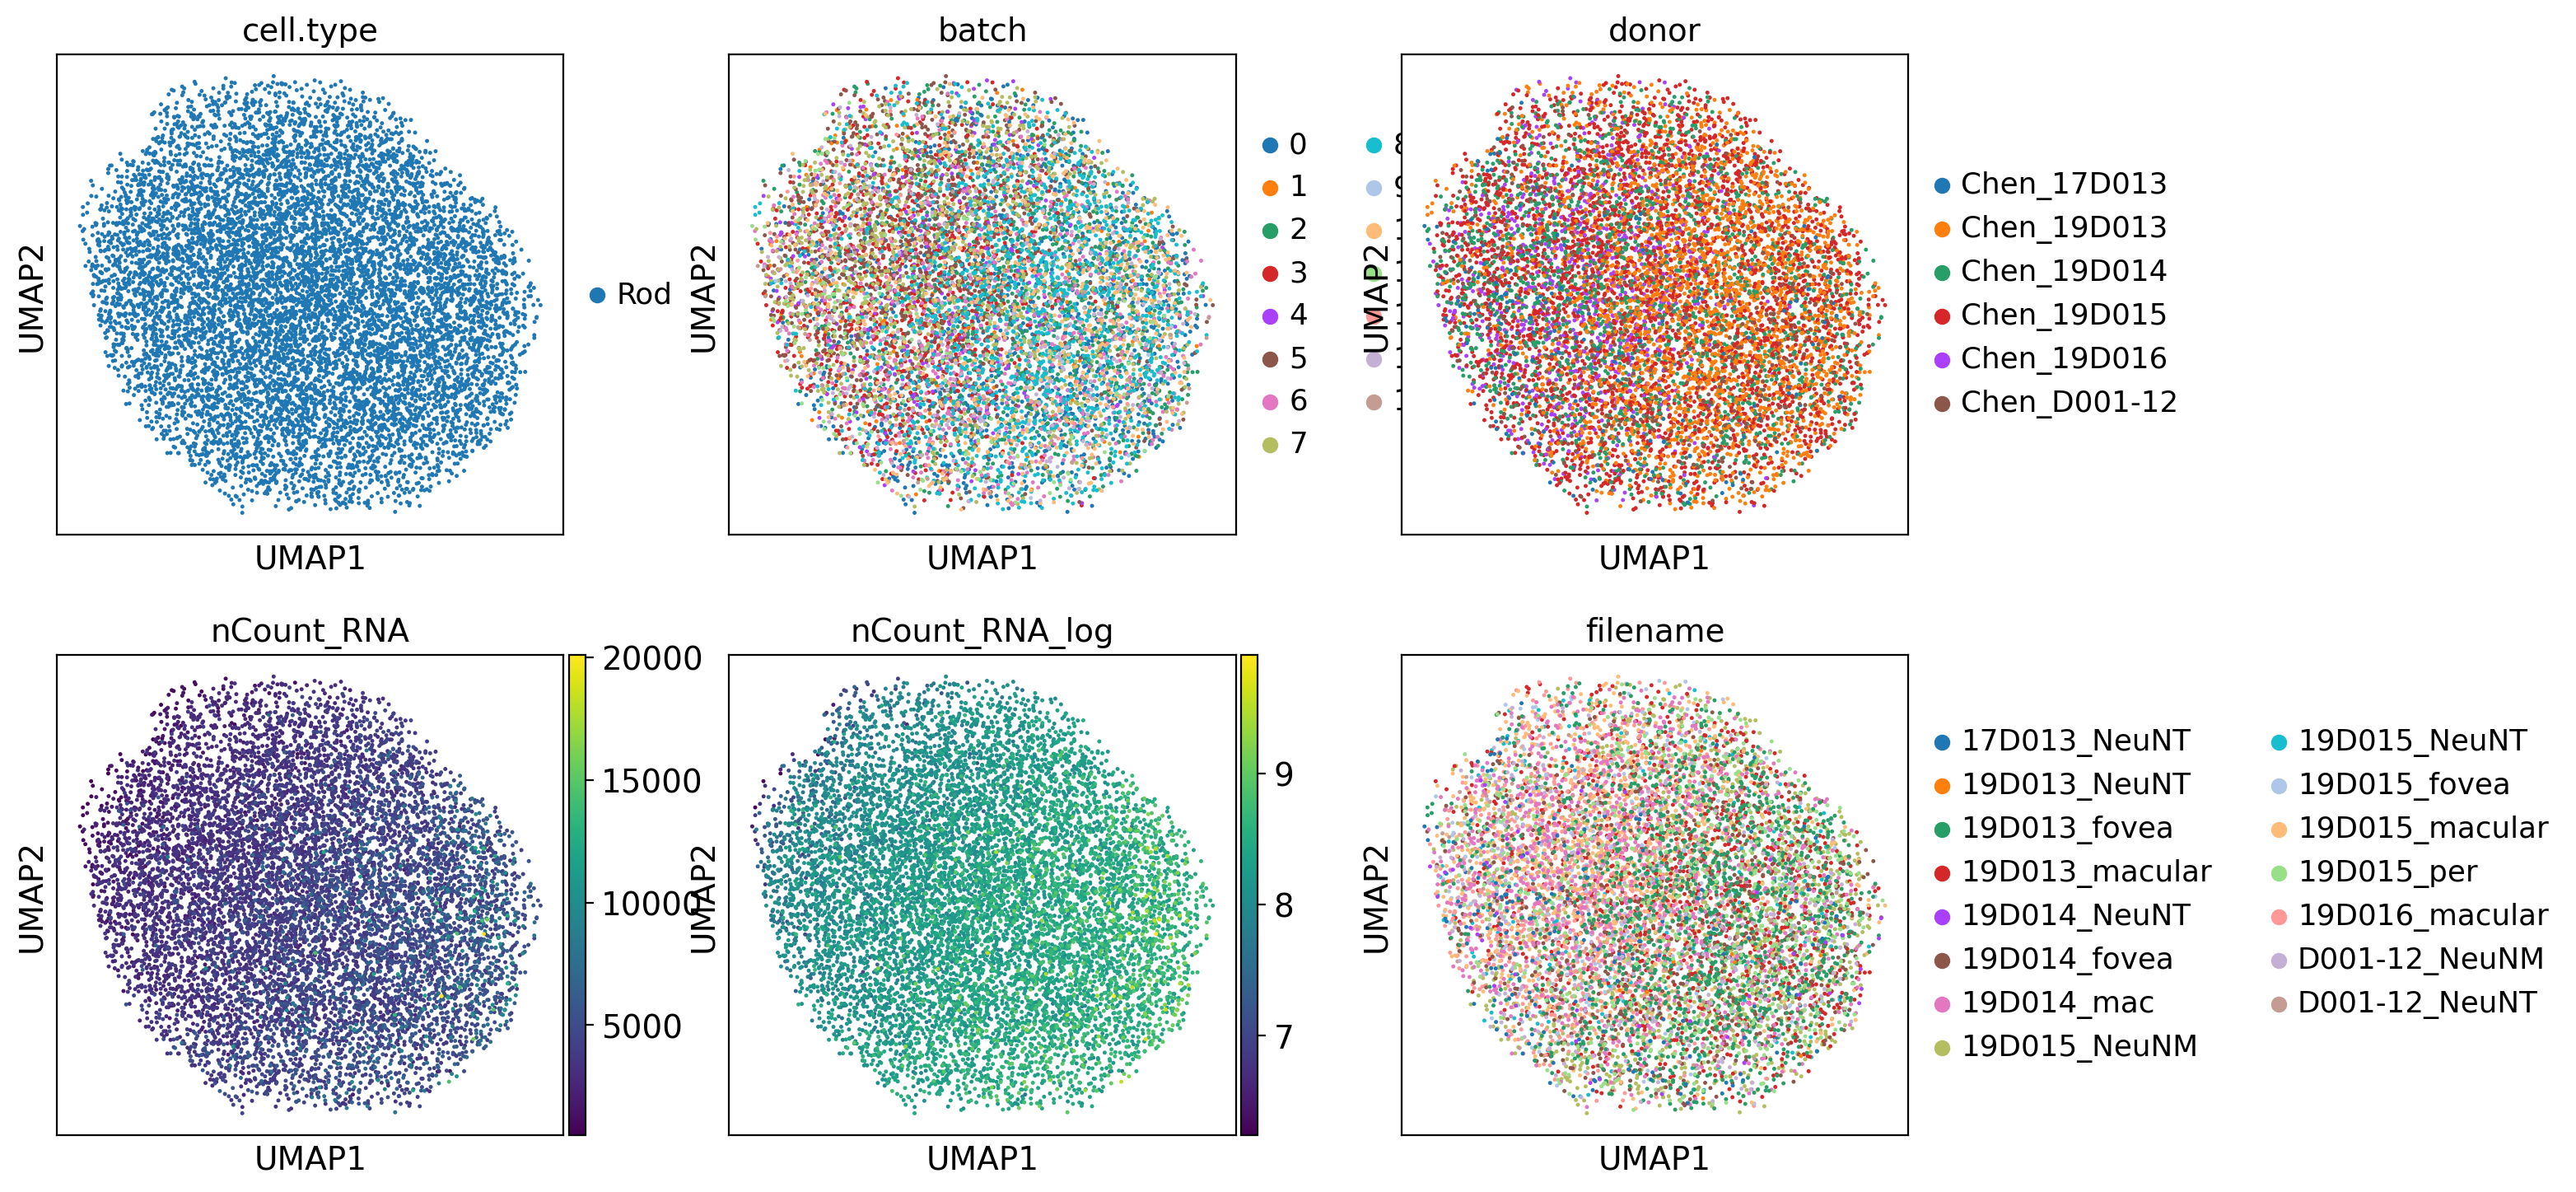

In [39]:
sc.pl.umap(adata, color=['cell.type','batch', 'donor', 'nCount_RNA', 'nCount_RNA_log', 'filename'], ncols=3)

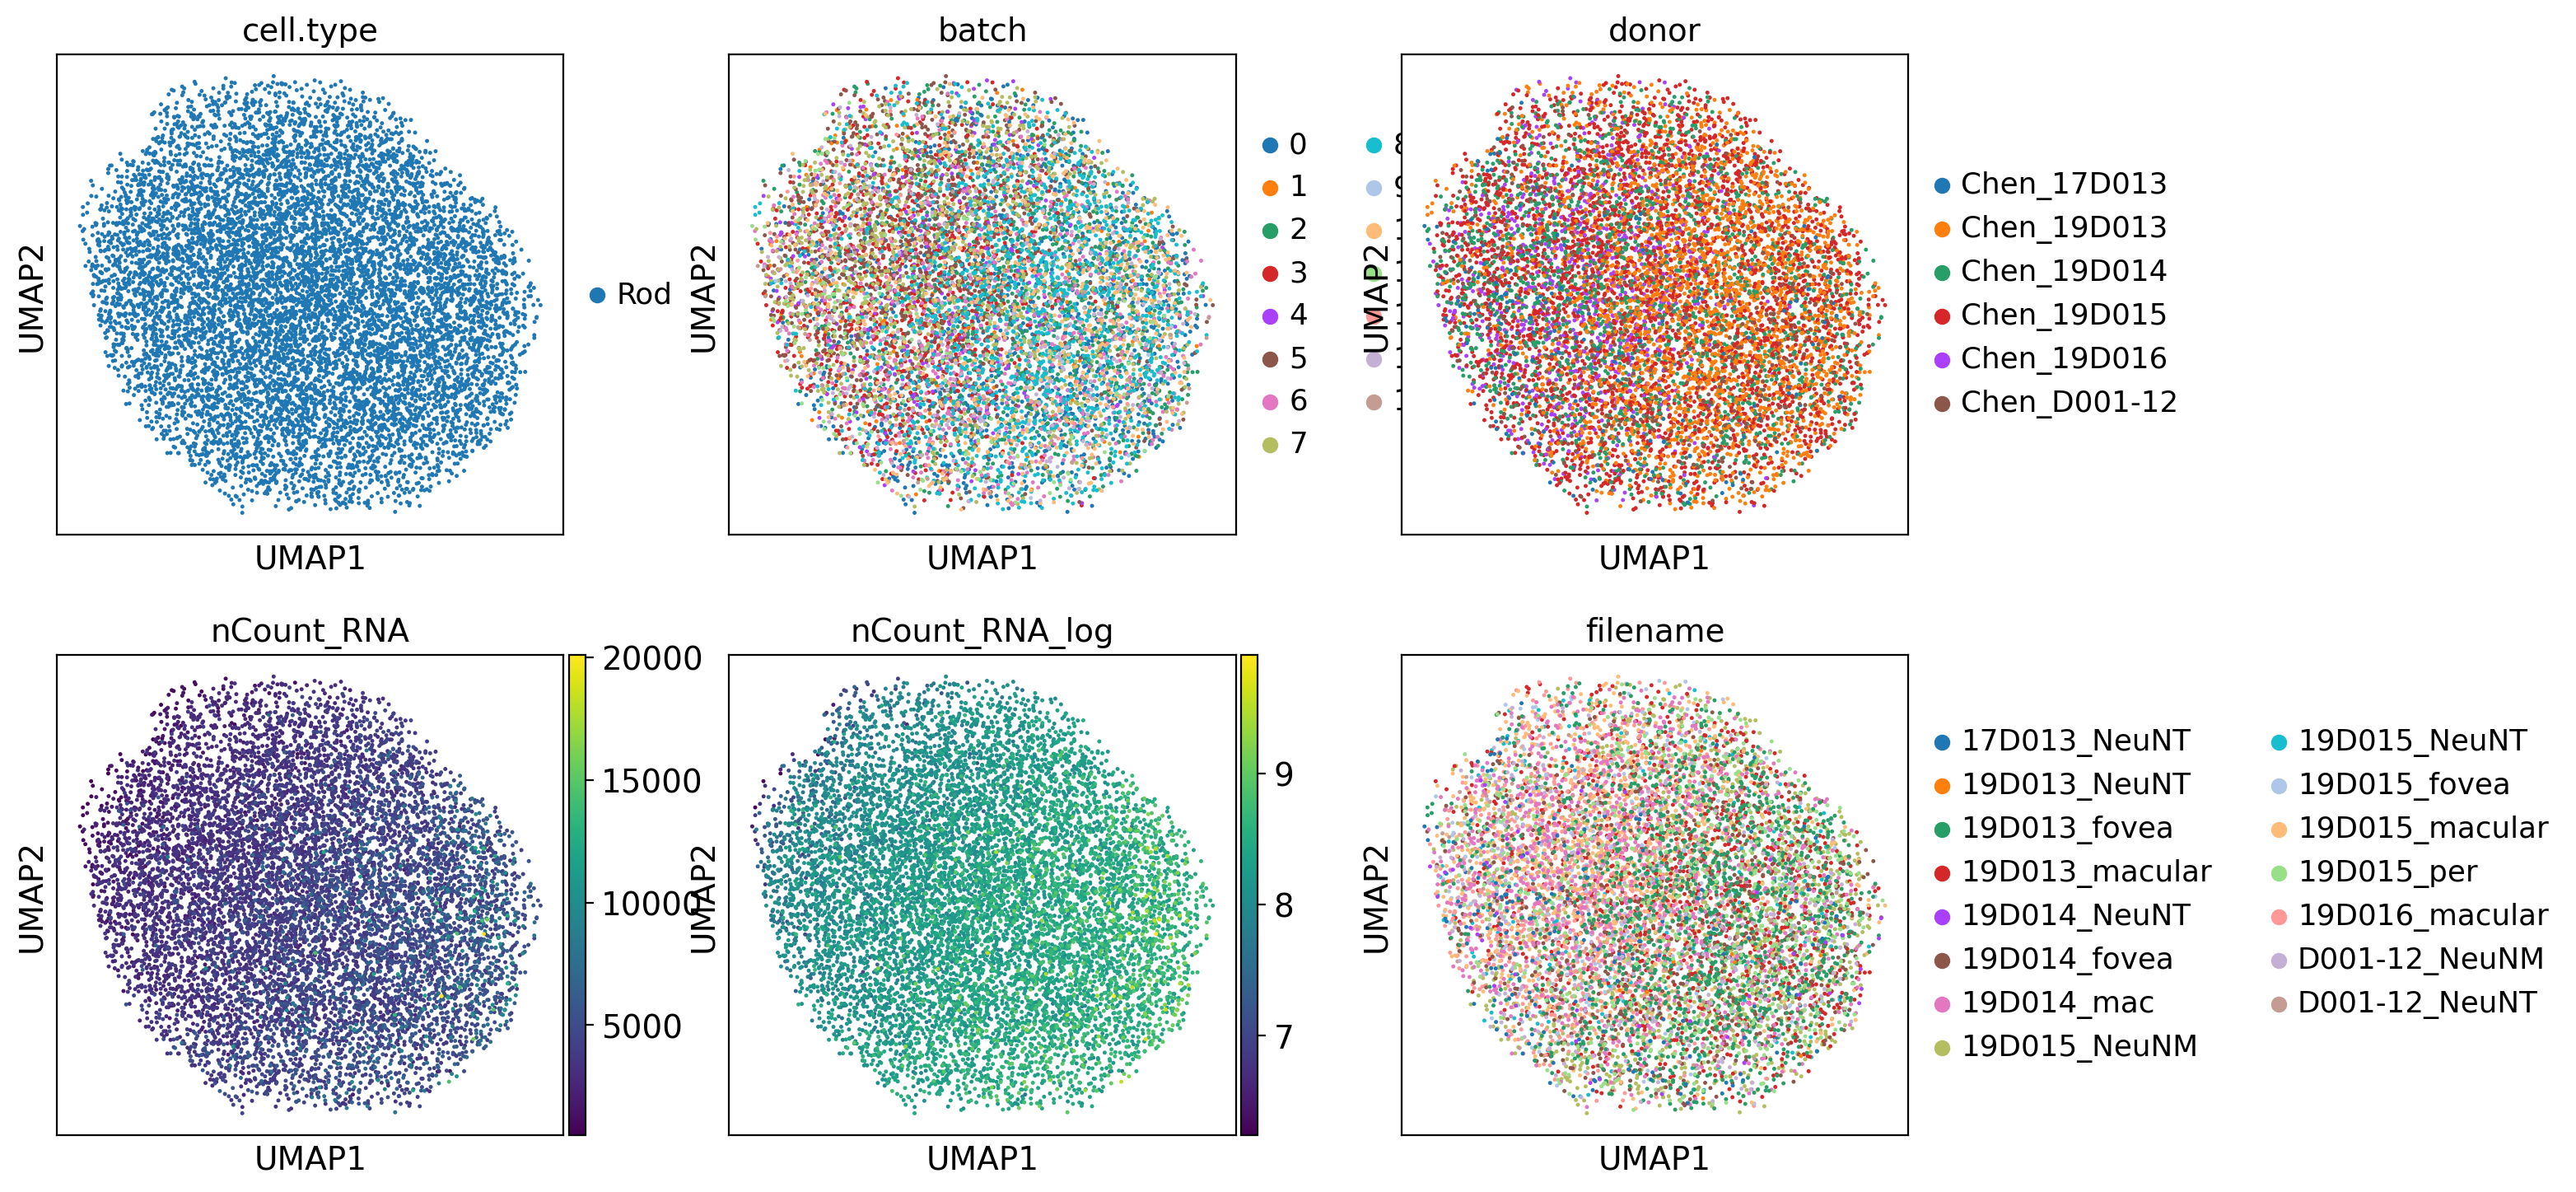

In [40]:
sc.pl.umap(adata, color=['cell.type','batch', 'donor', 'nCount_RNA', 'nCount_RNA_log', 'filename'], ncols=3)